# 📊 Projeto – Segmentação de Clientes com K-Means
**Notebook completo e funcional usando arquivo local (`mall_customers.csv`).**

**Membros: Pedro Henrique Adorno Malagutti & Jonas Evangelista dos Santos.**

Estrutura:
- Introdução e contextualização
- Ferramentas utilizadas
- Preparação dos dados
- Implementação do algoritmo K-Means
- Elbow method + Silhouette
- Visualizações
- Conclusões


## 📌 Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

sns.set(style='whitegrid')

## 📁 Carregamento do arquivo local

In [2]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,49,68,86
1,2,Female,56,22,57
2,3,Male,66,41,29
3,4,Male,69,41,78
4,5,Male,49,112,92


## 🔍 Análise inicial dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,44.405000,77.035000,51.200000
std,57.879185,15.353816,36.558397,29.816019
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,32.750000,44.000000,24.000000
50%,100.500000,46.000000,74.000000,50.000000
75%,150.250000,56.000000,111.000000,76.500000
max,200.000000,69.000000,139.000000,100.000000


## 🧹 Pré-processamento e normalização

In [5]:
df_numeric = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

## 📉 Método do Cotovelo (Elbow Method)

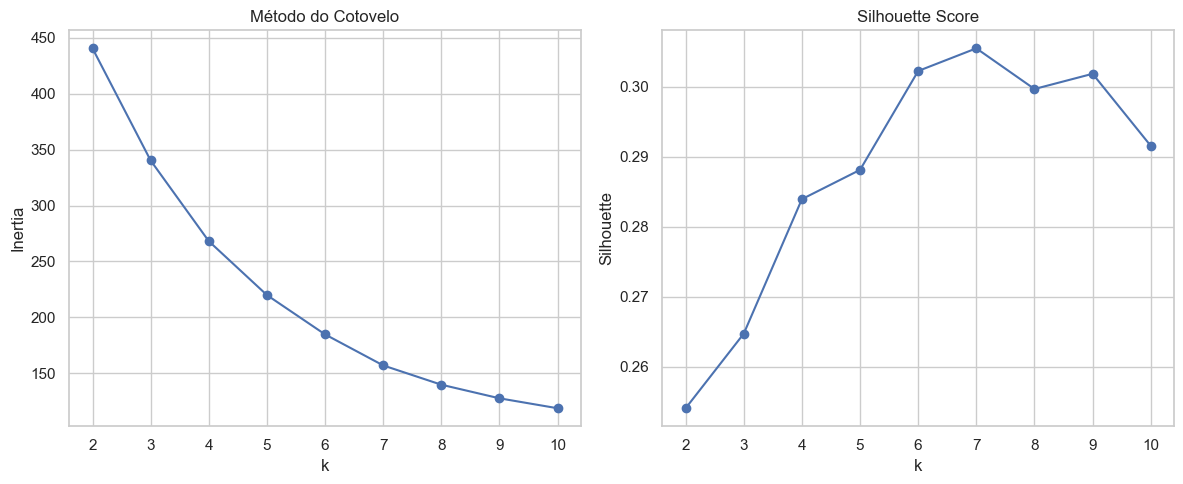

In [6]:
inertias = []
sil_scores = []
k_range = range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_range, inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')

plt.tight_layout()
plt.show()

## 🤖 Treinamento do Modelo K-Means (k=5 como exemplo)

In [7]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,49,68,86,1
1,2,Female,56,22,57,1
2,3,Male,66,41,29,2
3,4,Male,69,41,78,1
4,5,Male,49,112,92,3


## ⭐ Centroides dos clusters

In [8]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=df_numeric.columns)
centroids_df

,Age,Annual Income (k$),Spending Score (1-100)
0,29.729730,40.837838,39.135135
1,56.263158,46.894737,77.973684
2,57.140000,78.660000,26.180000
3,42.000000,108.833333,80.020833
4,28.518519,109.518519,25.148148


## 🎨 Visualização dos clusters (Annual Income x Spending Score)

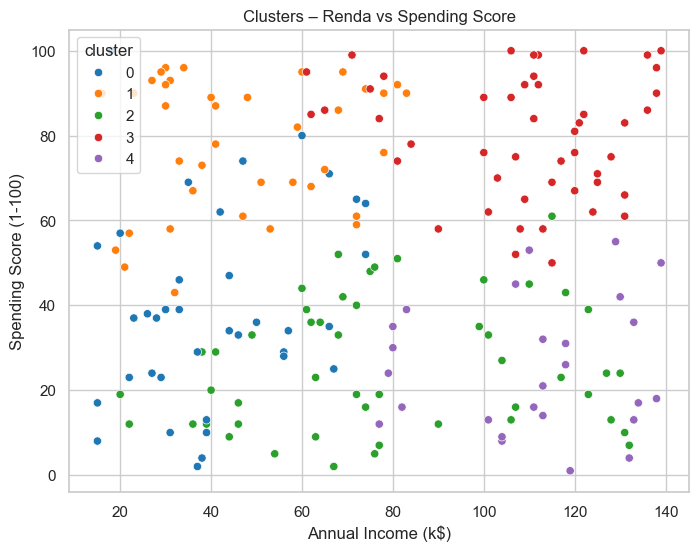

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='tab10')
plt.title('Clusters – Renda vs Spending Score')
plt.show()

## 🌀 Visualização com PCA (2D)

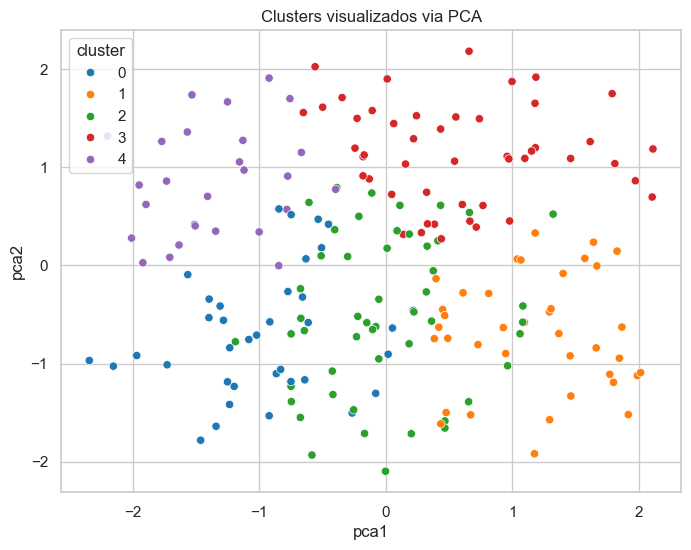

In [10]:
pca = PCA(n_components=2)
pca_vals = pca.fit_transform(X_scaled)
df['pca1'] = pca_vals[:,0]
df['pca2'] = pca_vals[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title('Clusters visualizados via PCA')
plt.show()

# 🧾 Conclusão

A análise realizada permitiu compreender como o algoritmo **K-Means** pode ser aplicado de forma eficiente para segmentar clientes com base em variáveis relacionadas ao comportamento de consumo, como idade, renda anual e nível de gasto. Após o pré-processamento adequado — incluindo normalização dos dados — e a avaliação do número ideal de clusters através do **Método do Cotovelo** e do **Silhouette Score**, chegamos a uma estrutura de agrupamento consistente, adotando **k = 5** como configuração final.

Os clusters obtidos representam diferentes perfis de consumidores, permitindo identificar padrões importantes, como:

- **Clientes de alta renda e alto gasto**, com forte potencial para estratégias premium e ofertas personalizadas.
- **Clientes de baixa renda e baixo gasto**, que tendem a exigir abordagens mais conservadoras e promoções direcionadas.
- **Clientes com boa renda, mas baixo nível de gasto**, sugerindo oportunidades de desenvolver ações que aumentem seu engajamento.
- **Clientes jovens com gasto elevado**, possivelmente influenciados por estilo de vida e consumo mais impulsivo.
- **Clientes mais velhos com comportamento de gasto moderado**, representando um público mais estável e previsível.

Esses padrões demonstram como o K-Means ajuda a revelar estruturas não explícitas nos dados, oferecendo uma base sólida para decisões de marketing, gestão de produto e estratégias comerciais.

Apesar dos resultados satisfatórios, o algoritmo apresenta **limitações importantes**:  
- Ele assume que os clusters possuem formatos esféricos e tamanhos semelhantes, o que nem sempre reflete a realidade.  
- É **sensível à escala** e depende fortemente da normalização correta.  
- É também sensível a **outliers**, que podem distorcer os centróides.  
- A escolha de *k* não é objetiva e exige interpretação humana.

Como possíveis **melhorias**, seria útil testar métodos alternativos, como:  
- **DBSCAN**, que identifica clusters de formatos irregulares e lida melhor com outliers.

Outra sugestão seria enriquecer a base de dados com variáveis adicionais, como frequência de compras, categorias de interesse, ticket médio e comportamento ao longo do tempo, tornando a segmentação ainda mais precisa e útil.

Em resumo, o K-Means mostrou-se uma ferramenta simples e poderosa para introduzir a segmentação de clientes, fornecendo uma visão clara de diferentes perfis dentro da base analisada e abrindo caminho para estratégias mais eficientes e orientadas por dados.